In [3]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### Основная часть

In [11]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [5]:
# strategy, popsize, tol, mutation, recombination и updating.

In [6]:
# strategy

In [7]:
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [8]:
strategy_nit = {}
for i in strategy:
    res = differential_evolution(ackley, bounds, seed=42, strategy=i)
    strategy_nit[i] = res.nit


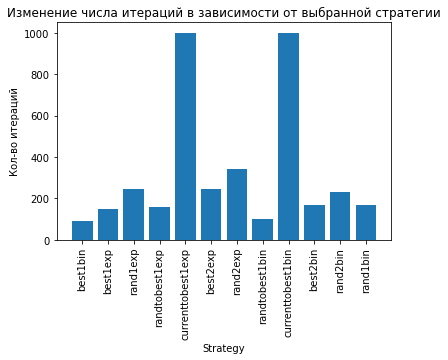

In [9]:
plt.bar(strategy_nit.keys(), strategy_nit.values())
plt.title('Изменение числа итераций в зависимости от выбранной стратегии')
plt.xlabel("Strategy")
plt.ylabel("Кол-во итераций")
plt.xticks(rotation=90)
plt.show()

In [12]:
# popsize

In [13]:
popsize = {}
n = 1
while n <= 35:
    res = differential_evolution(ackley, bounds, seed=42, popsize=n)
    popsize[n] = res.nit
    n += 2


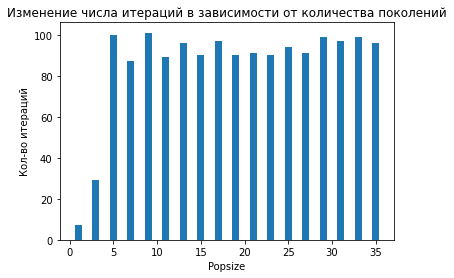

In [14]:
plt.bar(popsize.keys(), popsize.values())
plt.title('Изменение числа итераций в зависимости от количества поколений')
plt.xlabel("Popsize")
plt.ylabel("Кол-во итераций")
plt.show()

In [15]:
# tol

In [16]:
tol = {}
t = 0.001
while t <= 0.3:
    res = differential_evolution(ackley, bounds, seed=42, tol=t)
    tol[t] = res.nit
    t *= 2

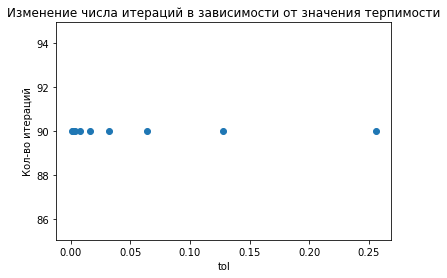

In [17]:
plt.plot(tol.keys(), tol.values(), 'o')
plt.title('Изменение числа итераций в зависимости от значения терпимости')
plt.xlabel("tol")
plt.ylabel("Кол-во итераций")
plt.show()

In [18]:
# mutation

In [19]:
mutation = {}
m = 0
while m <= 2:
    res = differential_evolution(ackley, bounds, seed=42, mutation=m)
    mutation[m] = res.nit
    m += 0.2

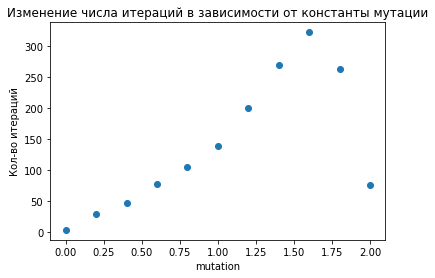

In [20]:
plt.plot(mutation.keys(), mutation.values(), 'o')
plt.title('Изменение числа итераций в зависимости от константы мутации')
plt.xlabel("mutation")
plt.ylabel("Кол-во итераций")
plt.show()

In [21]:
# recombination

In [22]:
recomb = {}
r = 0
while r <= 1:
    res = differential_evolution(ackley, bounds, seed=42, recombination=r)
    recomb[r] = res.nit
    r += 0.1

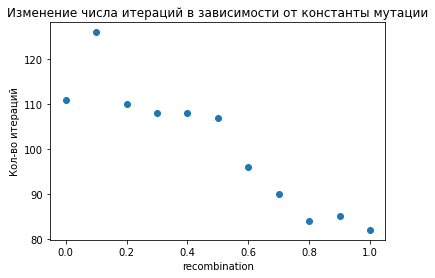

In [23]:
plt.plot(recomb.keys(), recomb.values(), 'o')
plt.title('Изменение числа итераций в зависимости от константы мутации')
plt.xlabel("recombination")
plt.ylabel("Кол-во итераций")
plt.show()

In [24]:
# updating

In [25]:
updating =['immediate', 'deferred']

In [26]:
update = {}
for i in updating:
    res = differential_evolution(ackley, bounds, seed=42, updating=i)
    update[i] = res.nit


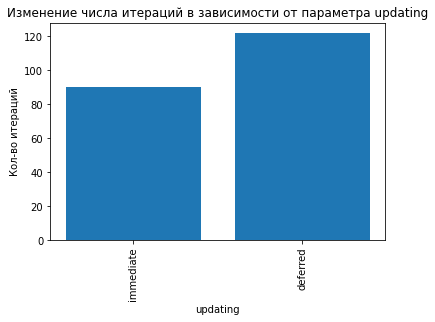

In [27]:
plt.bar(update.keys(), update.values())
plt.title('Изменение числа итераций в зависимости от параметра updating')
plt.xlabel("updating")
plt.ylabel("Кол-во итераций")
plt.xticks(rotation=90)
plt.show()

### Дополнительная часть

In [28]:
# Метод довольно "топорный", считает достаточно долго, на шагах, способных показать хоть сколько-нибудь значимую картину
# требуется 6-8 часов. Вылетает с ошибкой "not enough values to unpack (expected 5, got 4)", при этом датафрейм создает,
# причину ошибки я так и не нашла. Поскольку сроки поджимают, доработать уже не успеваю

In [29]:
import pandas as pd
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
n = 1
t = 0.001
m = 0.05
r = 0
updating = ['immediate', 'deferred']

params_table = {'strategy': [],
                'popsize': [],
                'tol': [],
                'mutation': [],
                'recombination': [],
                'updating': [],
                'n_iter':[]
}
df_params = pd.DataFrame(params_table)

In [30]:
for i in strategy:
    while n <= 20:
        while t <= 0.3:
            while m < 2:
                while r <= 1:
                    for k in updating:
                        res = differential_evolution(ackley, bounds, seed=42, strategy=i, popsize=n, tol=t, mutation=m, recombination=r, updating=k)
                        if res.x[0] < 1e-06 and res.x[1] < 1e-06:
                            row = {'strategy':i, 'popsize':n, 'tol':t, 'mutation':m, 'recombination':r, 'updating':k, 'n_iter':res.nit}
                            df_params = df_params.append(row, ignore_index=True)
                    r += 0.3
                r = 0
                m += 0.5
            m = 0
            t += 0.1
        t = 0.01
        n += 5
    n = 1


ValueError: not enough values to unpack (expected 5, got 4)

In [31]:
df_params.sort_values('n_iter')

,strategy,popsize,tol,mutation,recombination,updating,n_iter
554,rand1exp,1.0,0.210,0.0,0.9,immediate,1.0
31,best1bin,1.0,0.101,0.0,0.9,immediate,1.0
302,best1exp,1.0,0.110,0.0,0.9,deferred,1.0
50,best1bin,1.0,0.201,0.0,0.6,immediate,1.0
51,best1bin,1.0,0.201,0.0,0.6,deferred,1.0
...,...,...,...,...,...,...,...
1197,currenttobest1exp,16.0,0.110,1.5,0.9,immediate,1000.0
1196,currenttobest1exp,16.0,0.110,1.5,0.6,deferred,1000.0
1195,currenttobest1exp,16.0,0.110,1.5,0.6,immediate,1000.0
1204,currenttobest1exp,16.0,0.210,0.5,0.9,deferred,1000.0
